In [1]:
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import sqlite3
import numpy as np
from lsst.sims.maf.metrics.snNSNMetric import SNNSNMetric
import healpy as hp
import time

In [2]:
files = ['baseline_nexp1_v1.7_10yrs.db',
          'baseline_nexp2_v1.7_10yrs.db',
         'rolling_nm_scale0.75_nslice2_fpw0.6_unc_v1.7_10yrs.db',
         'rolling_nm_scale0.75_nslice3_fpw0.6_unc_v1.7_10yrs.db']

In [6]:
nside = 16


Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Loading  /Users/yoachim/gitRepos/sims_maf_contrib/data/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 18174 699 26
Loading  /Users/yoachim/gitRepos/sims_maf_contrib/data/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 68502 699 98
Loading  /Users/yoachim/gitRepos/sims_maf_contrib/data/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 44037 699 63
Loading  /Users/yoachim/gitRepos/sims_maf_contrib/data/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 y 55221 699 79
Loading  /Users/yoachim/gitRepos/sims_maf_contrib/data/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 z 64308 699 92
Loading  /Users/yoachim/gitRepos/sims_maf_contrib/data/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 18174 699 26
Loading  /Users/yoachim/gitRepos/sims_maf_contrib/data/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 68502 699 98
Loading  /Users/yoachim/gitRepos/sims

/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:518: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')
/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/healpy/pixelfunc.py:1583: UserWarning: monopole: 12.8672  dipole: lon: 115.826, lat: -49.9064, amp: 14.5898
  mono, lon, lat, amp
/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/healpy/pixelfunc.py:1583: UserWarning: monopole: 0.0259805  dipole: lon: 97.1819, lat: 8.72367, amp: 0.163733
  mono, lon, lat, amp


Plotting complete.
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Loading  /Users/yoachim/gitRepos/sims_maf_contrib/data/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 18174 699 26
Loading  /Users/yoachim/gitRepos/sims_maf_contrib/data/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 68502 699 98
Loading  /Users/yoachim/gitRepos/sims_maf_contrib/data/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 44037 699 63
Loading  /Users/yoachim/gitRepos/sims_maf_contrib/data/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 y 55221 699 79
Loading  /Users/yoachim/gitRepos/sims_maf_contrib/data/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 z 64308 699 92
Loading  /Users/yoachim/gitRepos/sims_maf_contrib/data/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 18174 699 26
Loading  /Users/yoachim/gitRepos/sims_maf_contrib/data/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 68502 699 98
Loading  /Users/yo

/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:518: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')
/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/healpy/pixelfunc.py:1583: UserWarning: monopole: 10.8872  dipole: lon: 122.836, lat: -48.1754, amp: 11.832
  mono, lon, lat, amp
/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/healpy/pixelfunc.py:1583: UserWarning: monopole: 0.0281595  dipole: lon: 100.788, lat: 16.1759, amp: 0.153848
  mono, lon, lat, amp


Plotting complete.
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Loading  /Users/yoachim/gitRepos/sims_maf_contrib/data/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 18174 699 26
Loading  /Users/yoachim/gitRepos/sims_maf_contrib/data/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 68502 699 98
Loading  /Users/yoachim/gitRepos/sims_maf_contrib/data/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 44037 699 63
Loading  /Users/yoachim/gitRepos/sims_maf_contrib/data/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 y 55221 699 79
Loading  /Users/yoachim/gitRepos/sims_maf_contrib/data/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 z 64308 699 92
Loading  /Users/yoachim/gitRepos/sims_maf_contrib/data/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 18174 699 26
Loading  /Users/yoachim/gitRepos/sims_maf_contrib/data/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 68502 699 98
Loading  /Users/yo

/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:518: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')
/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/healpy/pixelfunc.py:1583: UserWarning: monopole: 12.3787  dipole: lon: 104.816, lat: -55.8253, amp: 12.4276
  mono, lon, lat, amp
/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/healpy/pixelfunc.py:1583: UserWarning: monopole: 0.0218145  dipole: lon: 98.2741, lat: 7.92391, amp: 0.147203
  mono, lon, lat, amp


Plotting complete.
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Loading  /Users/yoachim/gitRepos/sims_maf_contrib/data/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 18174 699 26
Loading  /Users/yoachim/gitRepos/sims_maf_contrib/data/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 68502 699 98
Loading  /Users/yoachim/gitRepos/sims_maf_contrib/data/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 44037 699 63
Loading  /Users/yoachim/gitRepos/sims_maf_contrib/data/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 y 55221 699 79
Loading  /Users/yoachim/gitRepos/sims_maf_contrib/data/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 z 64308 699 92
Loading  /Users/yoachim/gitRepos/sims_maf_contrib/data/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 18174 699 26
Loading  /Users/yoachim/gitRepos/sims_maf_contrib/data/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 68502 699 98
Loading  /Users/yo

/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:518: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')
/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/healpy/pixelfunc.py:1583: UserWarning: monopole: 12.3314  dipole: lon: 102.915, lat: -56.222, amp: 12.1219
  mono, lon, lat, amp
/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/matplotlib/pyplot.

Plotting complete.
ran in 549.284255 min


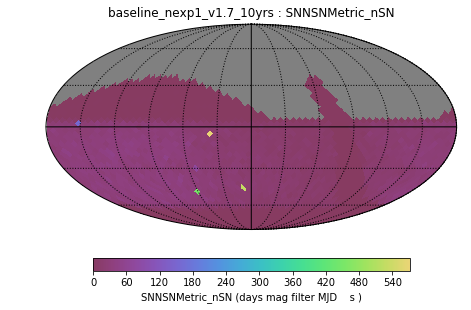

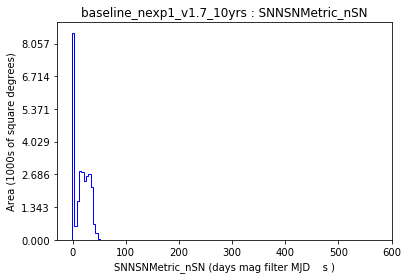

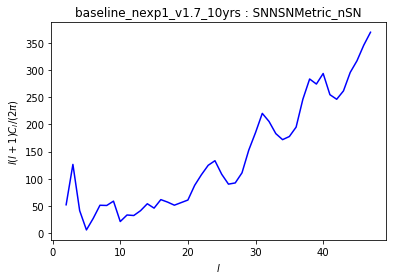

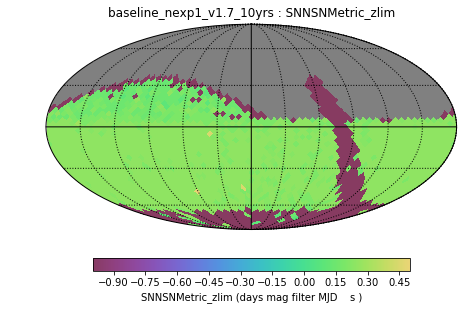

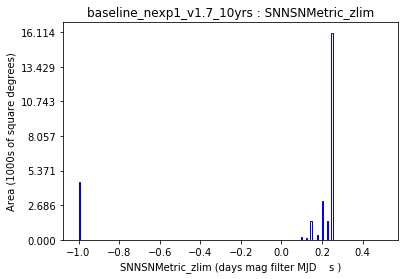

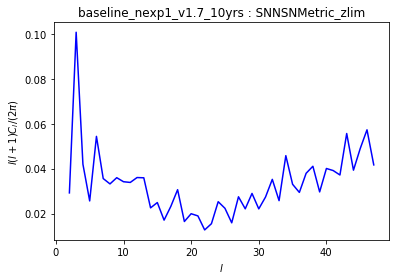

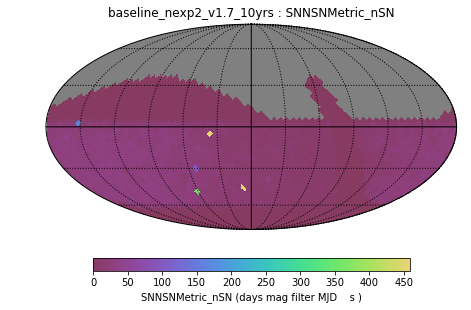

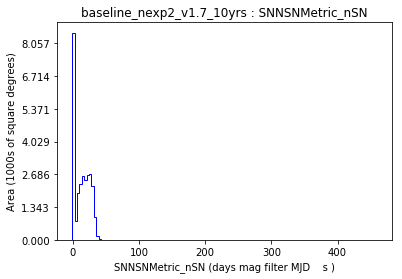

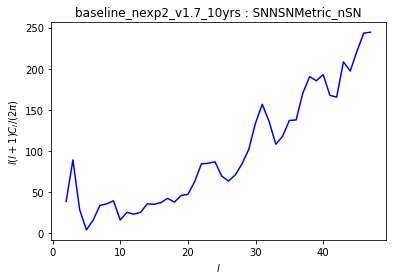

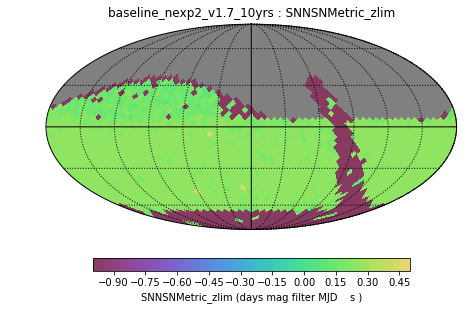

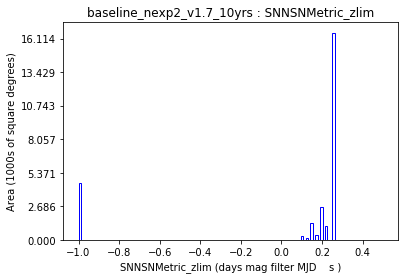

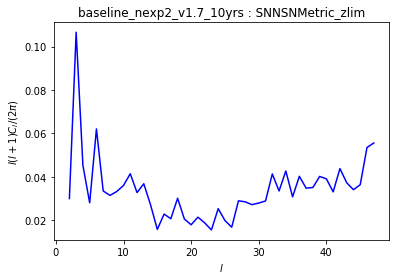

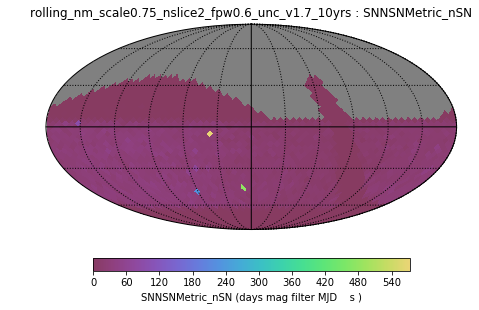

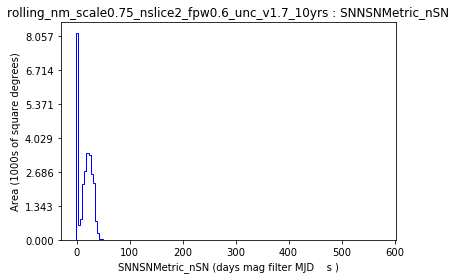

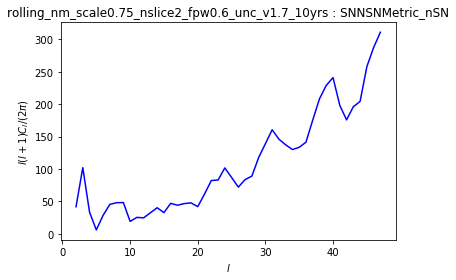

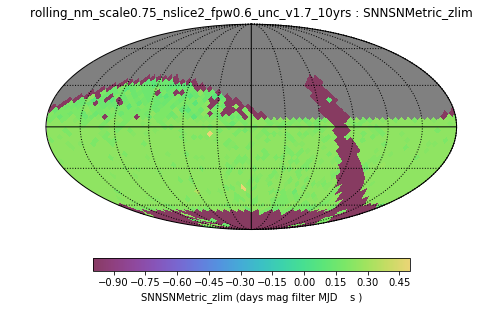

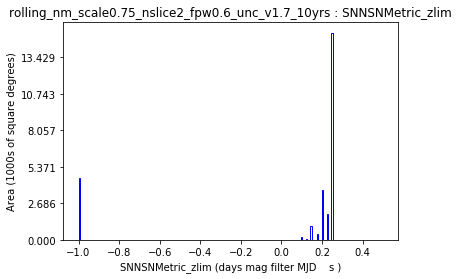

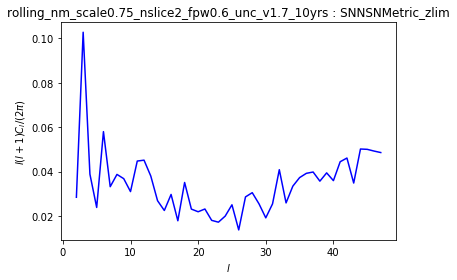

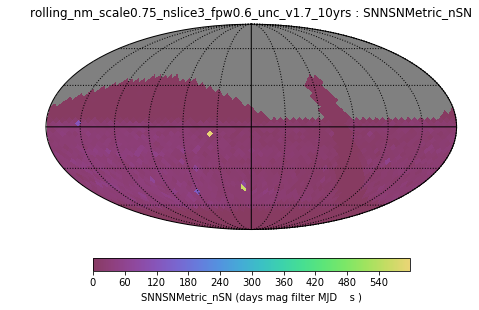

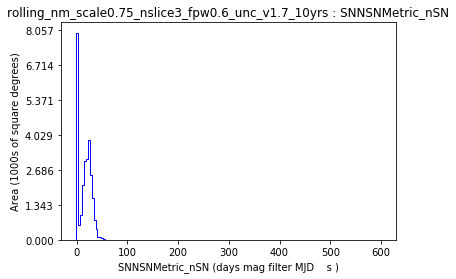

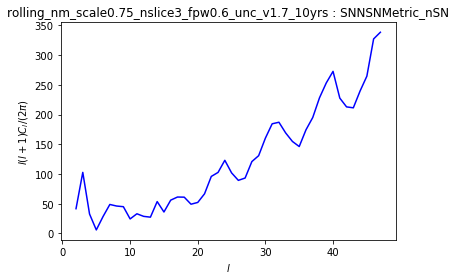

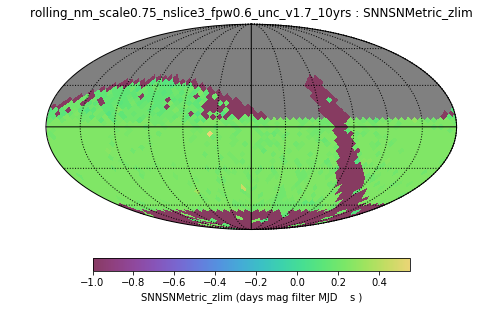

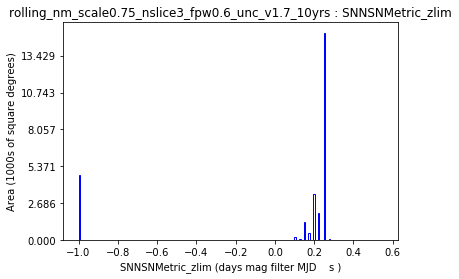

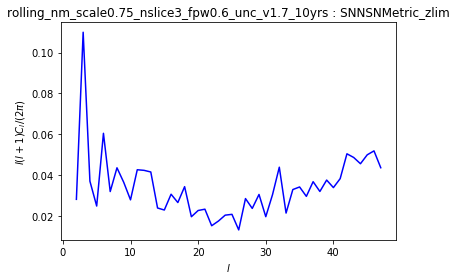

In [7]:
t1 = time.time()
all_results = []
for filename in files:
    opsimdb = db.OpsimDatabase(filename)
    runName = filename.replace('.db', '')
    slicer = slicers.HealpixSlicer(nside=nside)

    metric = SNNSNMetric(verbose=False)  #, zlim_coeff=0.98)

    bundleList = []

    sql = ''
    #sql = '(note = "%s")' %('DD:COSMOS')
    summaryStats = [metrics.SumMetric(), metrics.MedianMetric()]
    bundleList.append(metricBundles.MetricBundle(metric, slicer, sql, runName=runName, summaryMetrics=summaryStats))
    outDir = 'temp'
    resultsDb = db.ResultsDb(outDir=outDir)
    bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
    bgroup = metricBundles.MetricBundleGroup(bundleDict, opsimdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)
    all_results.append(bgroup)
t2 = time.time()
print('ran in %f min' % ((t2-t1)/60.))

In [9]:
for bd in all_results:
    print(bd.bundleDict['SNNSNMetric_nSN'].runName)
    print('N SN', bd.bundleDict['SNNSNMetric_nSN'].summaryValues['Sum'])
    print('median z', bd.bundleDict['SNNSNMetric_zlim'].summaryValues['Median'])
    print('----------')

baseline_nexp1_v1.7_10yrs
N SN 34769.592000000004
median z 0.25
----------
baseline_nexp2_v1.7_10yrs
N SN 28912.106
median z 0.25
----------
rolling_nm_scale0.75_nslice2_fpw0.6_unc_v1.7_10yrs
N SN 32959.713
median z 0.25
----------
rolling_nm_scale0.75_nslice3_fpw0.6_unc_v1.7_10yrs
N SN 32691.595999999998
median z 0.25
----------


Results from nside=8  ran in 140.546421 min
baseline_nexp1_v1.7_10yrs
N SN 35404.088
median z 0.25


baseline_nexp2_v1.7_10yrs
N SN 29472.862999999998
median z 0.25


rolling_nm_scale0.75_nslice2_fpw0.6_unc_v1.7_10yrs
N SN 32655.458
median z 0.25


rolling_nm_scale0.75_nslice3_fpw0.6_unc_v1.7_10yrs
N SN 31386.682
median z 0.25



Nside = 16  ran in 549.284255 min

